# Wine Quality Prediction
### Author : Farbodkhm

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import cross_val_score
import warnings
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from xgboost import XGBClassifier, XGBRFRegressor, XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, IsolationForest, RandomTreesEmbedding, HistGradientBoostingRegressor
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, r2_score, explained_variance_score, max_error, mean_squared_error, mean_absolute_percentage_error, d2_absolute_error_score, d2_pinball_score, d2_tweedie_score, mean_absolute_error
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
df = pd.read_csv('WineQuality.csv')

## EDA

In [3]:
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         32485 non-null  float64
 1   volatile acidity      32485 non-null  float64
 2   citric acid           32485 non-null  float64
 3   residual sugar        32485 non-null  float64
 4   chlorides             32485 non-null  float64
 5   free sulfur dioxide   32485 non-null  float64
 6   total sulfur dioxide  32485 non-null  float64
 7   density               32485 non-null  float64
 8   pH                    32485 non-null  float64
 9   sulphates             32485 non-null  float64
 10  alcohol               32485 non-null  float64
 11  quality               32485 non-null  int64  
 12  Type                  32485 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 3.2+ MB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,32485.0,7.214736,1.308216,3.80000,6.4000,7.0000,7.700,15.90000
volatile acidity,32485.0,0.340122,0.164912,0.08000,0.2300,0.2900,0.410,1.58000
citric acid,32485.0,0.318324,0.145152,0.00000,0.2500,0.3100,0.390,1.66000
residual sugar,32485.0,5.438696,4.799221,0.60000,1.8000,3.0000,8.100,65.80000
chlorides,32485.0,0.056009,0.034503,0.00900,0.0380,0.0470,0.065,0.61100
free sulfur dioxide,32485.0,30.458258,17.608076,1.00000,17.0000,29.0000,41.000,289.00000
total sulfur dioxide,32485.0,115.656303,56.456074,6.00000,77.0000,118.0000,156.000,440.00000
density,32485.0,0.994719,0.003015,0.98711,0.9924,0.9949,0.997,1.03898
pH,32485.0,3.219089,0.161441,2.72000,3.1100,3.2100,3.320,4.01000
sulphates,32485.0,0.531500,0.148712,0.22000,0.4300,0.5100,0.600,2.00000


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

In [9]:
df.Type.unique()

array(['White Wine', 'Red Wine'], dtype=object)

In [10]:
df['quality'].value_counts()

6    14117
5    10755
7     5371
4     1144
8      941
3      133
9       24
Name: quality, dtype: int64

<Axes: xlabel='volatile acidity', ylabel='fixed acidity'>

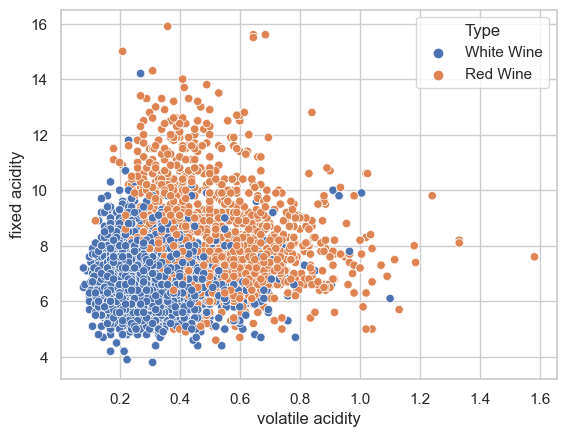

In [11]:
sns.set(style='whitegrid')
sns.scatterplot(data=df, y='fixed acidity', x='volatile acidity', color='Purple', hue='Type')

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

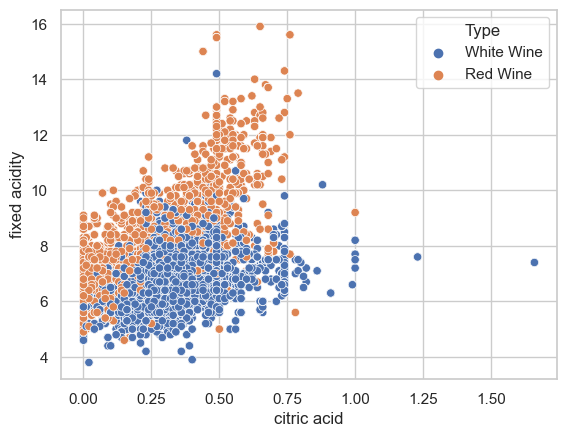

In [12]:
sns.scatterplot(data=df, y='fixed acidity', x='citric acid', color='Purple', hue='Type')

<Axes: xlabel='density', ylabel='fixed acidity'>

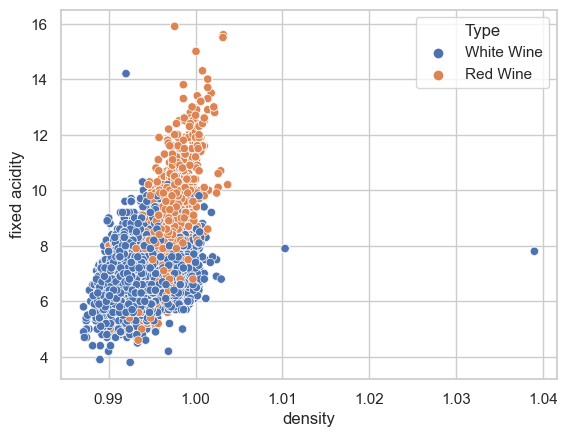

In [13]:
sns.scatterplot(data=df, y='fixed acidity', x='density', color='Purple', hue='Type')

<Axes: xlabel='citric acid', ylabel='volatile acidity'>

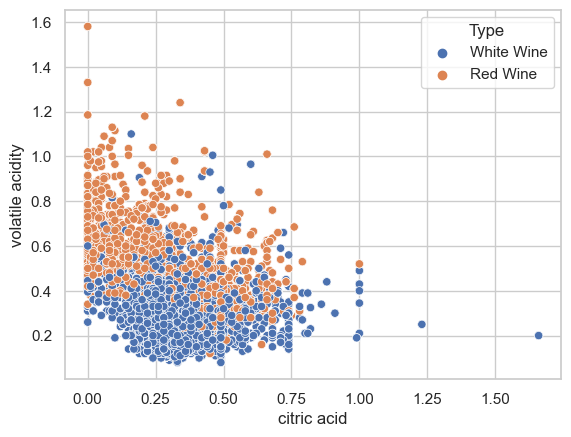

In [14]:
sns.scatterplot(data=df, y='volatile acidity', x='citric acid', color='Purple', hue='Type')

<Axes: xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

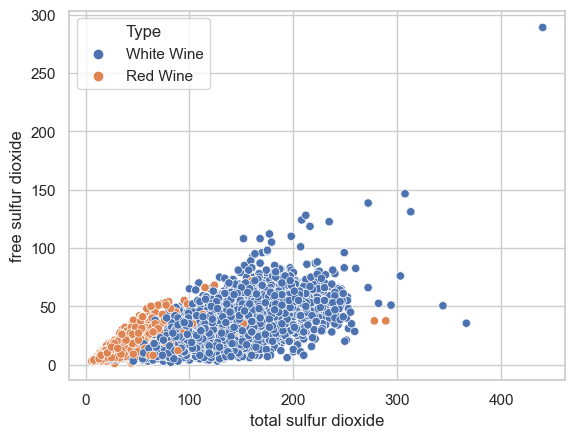

In [15]:
sns.scatterplot(data=df, y='free sulfur dioxide', x='total sulfur dioxide', color='Purple', hue='Type')

<Axes: xlabel='density', ylabel='pH'>

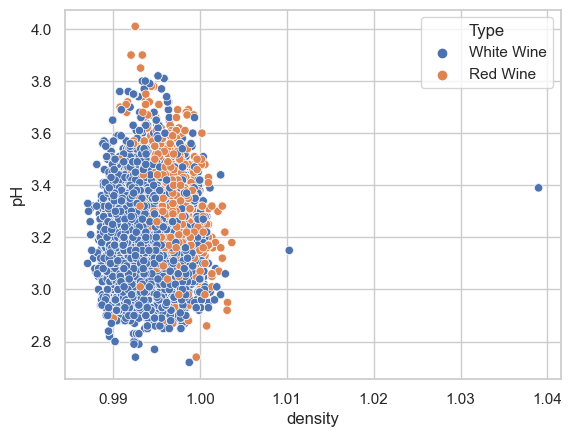

In [16]:
sns.scatterplot(data=df, x='density', y='pH', color='Purple', hue='Type')

<Axes: xlabel='density', ylabel='residual sugar'>

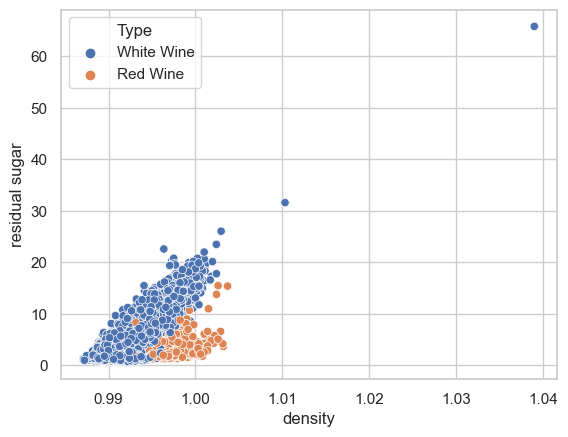

In [17]:
sns.scatterplot(data=df, x='density', y='residual sugar', color='Purple', hue='Type')

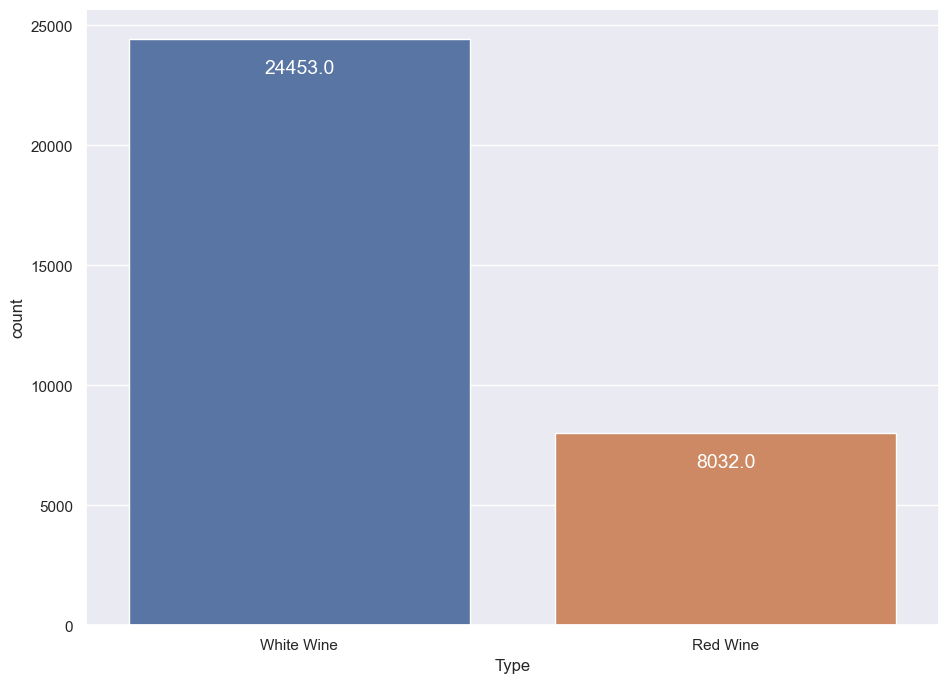

In [18]:
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.countplot(x='Type', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)

## Encoding

In [19]:
typeEncoder = {
    'White Wine' : 0,
    'Red Wine' : 1
}

df['Type'].replace(typeEncoder, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,0
1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,0
2,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,0
3,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,0
4,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,0


## Correlation

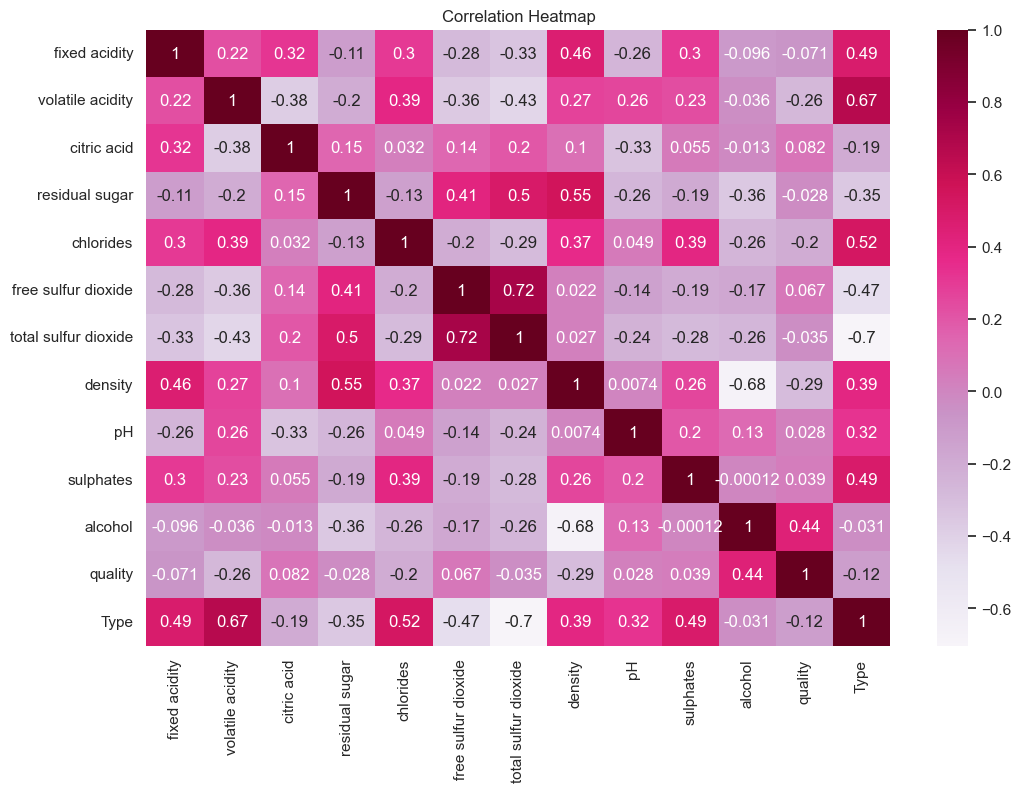

In [20]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="PuRd")
plt.title("Correlation Heatmap")
plt.show()

## Split Train & Test

In [21]:
x = df.drop(columns='quality')
y = df['quality']

In [22]:
y

0        6
1        6
2        6
3        6
4        5
        ..
32480    6
32481    5
32482    6
32483    7
32484    4
Name: quality, Length: 32485, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Training the Model

In [24]:
classifier = RandomForestClassifier(n_jobs=-1, n_estimators=30, random_state=0, criterion='gini')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10, n_jobs=-1)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(cm)

Accuracy is: 0.9952285670309373
Accuracy: 99.13 %
Standard Deviation: 0.25 %
[[  27    0    0    0    0    0    0]
 [   0  226    0    2    0    0    0]
 [   0    0 2134    9    0    0    0]
 [   0    0    9 2797    1    2    0]
 [   0    0    1    6 1110    0    0]
 [   0    0    0    1    0  169    0]
 [   0    0    0    0    0    0    3]]


In [25]:
classifier = KNeighborsClassifier(n_neighbors=1, metric='hamming', n_jobs=-1, algorithm='brute', weights='uniform')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(cm)

Accuracy is: 0.9921502231799292
Accuracy: 98.93 %
Standard Deviation: 0.24 %
[[  27    0    0    0    0    0    0]
 [   0  225    0    2    1    0    0]
 [   0    1 2128   14    0    0    0]
 [   1    1   12 2784   10    1    0]
 [   0    0    3    4 1110    0    0]
 [   0    0    1    0    0  169    0]
 [   0    0    0    0    0    0    3]]


In [26]:
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10, n_jobs=-1)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(cm)

Learning rate set to 0.093428
0:	learn: 1.7889706	total: 203ms	remaining: 3m 22s
1:	learn: 1.6737799	total: 216ms	remaining: 1m 47s
2:	learn: 1.5810758	total: 229ms	remaining: 1m 16s
3:	learn: 1.5089002	total: 241ms	remaining: 1m
4:	learn: 1.4483685	total: 253ms	remaining: 50.3s
5:	learn: 1.3980992	total: 265ms	remaining: 43.9s
6:	learn: 1.3551074	total: 277ms	remaining: 39.3s
7:	learn: 1.3143616	total: 289ms	remaining: 35.8s
8:	learn: 1.2816311	total: 300ms	remaining: 33s
9:	learn: 1.2510010	total: 313ms	remaining: 30.9s
10:	learn: 1.2235170	total: 324ms	remaining: 29.2s
11:	learn: 1.2009900	total: 336ms	remaining: 27.7s
12:	learn: 1.1799782	total: 348ms	remaining: 26.4s
13:	learn: 1.1608803	total: 360ms	remaining: 25.3s
14:	learn: 1.1439026	total: 372ms	remaining: 24.4s
15:	learn: 1.1279271	total: 386ms	remaining: 23.7s
16:	learn: 1.1144044	total: 398ms	remaining: 23s
17:	learn: 1.0999737	total: 411ms	remaining: 22.4s
18:	learn: 1.0877851	total: 422ms	remaining: 21.8s
19:	learn: 1.07

In [27]:
classifier = LGBMClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10, n_jobs=-1)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(cm)

Accuracy is: 0.9281206710789596
Accuracy: 92.76 %
Standard Deviation: 0.29 %
[[  27    0    0    0    0    0    0]
 [   0  225    0    3    0    0    0]
 [   0    0 1976  163    2    0    2]
 [   0    0  155 2615   39    0    0]
 [   0    0    2   98 1017    0    0]
 [   0    0    0    0    3  167    0]
 [   0    0    0    0    0    0    3]]
